In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Loading training Dataset
train = pd.read_csv('C:/Users/Lenovo/Desktop/IPY/HousePriceProblem/HousePricingTutorial_train.csv')

In [3]:
##The meaning of all the columns are...



##SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
##MSSubClass: The building class
##MSZoning: The general zoning classification
##LotFrontage: Linear feet of street connected to property
##LotArea: Lot size in square feet
##Street: Type of road access
##Alley: Type of alley access
##LotShape: General shape of property
##LandContour: Flatness of the property
##Utilities: Type of utilities available
##LotConfig: Lot configuration
##LandSlope: Slope of property
##Neighborhood: Physical locations within Ames city limits
##Condition1: Proximity to main road or railroad
##Condition2: Proximity to main road or railroad (if a second is present)
##BldgType: Type of dwelling
##HouseStyle: Style of dwelling
##OverallQual: Overall material and finish quality
##OverallCond: Overall condition rating
##YearBuilt: Original construction date
##YearRemodAdd: Remodel date
##RoofStyle: Type of roof
##RoofMatl: Roof material
##Exterior1st: Exterior covering on house
##Exterior2nd: Exterior covering on house (if more than one material)
##MasVnrType: Masonry veneer type
##MasVnrArea: Masonry veneer area in square feet
##ExterQual: Exterior material quality
##ExterCond: Present condition of the material on the exterior
##Foundation: Type of foundation
##BsmtQual: Height of the basement
##BsmtCond: General condition of the basement
##BsmtExposure: Walkout or garden level basement walls
##BsmtFinType1: Quality of basement finished area
##BsmtFinSF1: Type 1 finished square feet
##BsmtFinType2: Quality of second finished area (if present)
##BsmtFinSF2: Type 2 finished square feet
##BsmtUnfSF: Unfinished square feet of basement area
##TotalBsmtSF: Total square feet of basement area
##Heating: Type of heating
##HeatingQC: Heating quality and condition
##CentralAir: Central air conditioning
##Electrical: Electrical system
##1stFlrSF: First Floor square feet
##2ndFlrSF: Second floor square feet
##LowQualFinSF: Low quality finished square feet (all floors)
##GrLivArea: Above grade (ground) living area square feet
##BsmtFullBath: Basement full bathrooms
##BsmtHalfBath: Basement half bathrooms
##FullBath: Full bathrooms above grade
##HalfBath: Half baths above grade
##Bedroom: Number of bedrooms above basement level
##Kitchen: Number of kitchens
##KitchenQual: Kitchen quality
##TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
##Functional: Home functionality rating
##Fireplaces: Number of fireplaces
##FireplaceQu: Fireplace quality
##GarageType: Garage location
##GarageYrBlt: Year garage was built
##GarageFinish: Interior finish of the garage
##GarageCars: Size of garage in car capacity
##GarageArea: Size of garage in square feet
##GarageQual: Garage quality
##GarageCond: Garage condition
##PavedDrive: Paved driveway
##WoodDeckSF: Wood deck area in square feet
##OpenPorchSF: Open porch area in square feet
##EnclosedPorch: Enclosed porch area in square feet
##3SsnPorch: Three season porch area in square feet
##ScreenPorch: Screen porch area in square feet
##PoolArea: Pool area in square feet
##PoolQC: Pool quality
##Fence: Fence quality
##MiscFeature: Miscellaneous feature not covered in other categories
##MiscVal: $Value of miscellaneous feature
##MoSold: Month Sold
##YrSold: Year Sold
##SaleType: Type of sale
##SaleCondition: Condition of sale

In [4]:
#Shape of train data
train.shape

(1458, 81)

Skew is: 0.12173541793810867


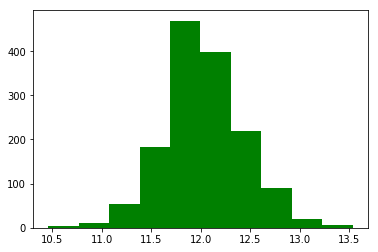

In [5]:
train['SalePrice'] = np.log1p(train['SalePrice'])

target = train['SalePrice']
print ("Skew is:", target.skew())
plt.hist(target, color='green')
plt.show()

In [6]:
#Finding all the Numerical columns
numeric_features = train.select_dtypes(include=[np.number])

In [7]:
#Finding the first five features that are most positively correlated with SalePrice
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')

SalePrice      1.000000
OverallQual    0.817178
GrLivArea      0.700871
GarageCars     0.680653
GarageArea     0.650867
Name: SalePrice, dtype: float64 



In [8]:
#Understanding NULL values and sorting them !
Isnull=train.isnull().sum()
Isnull.sort_values(inplace=True, ascending=False)
print(Isnull)

PoolQC           1451
MiscFeature      1404
Alley            1367
Fence            1177
FireplaceQu       688
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [9]:
#Examining the NULL values and filling with appropriate values:
#There are 19 columns with NULLs.

# PoolQC           1453
# MiscFeature      1406
# Alley            1369
# Fence            1179
# FireplaceQu       690
# LotFrontage       259
# GarageCond         81
# GarageType         81
# GarageYrBlt        81
# GarageFinish       81
# GarageQual         81
# BsmtExposure       38
# BsmtFinType2       38
# BsmtFinType1       37
# BsmtCond           37
# BsmtQual           37
# MasVnrArea          8
# MasVnrType          8
# Electrical          1


train['PoolQC'] = train['PoolQC'].fillna('None')
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
train['GarageType'] = train['GarageType'].fillna('None')
train['GarageFinish'] = train['GarageFinish'].fillna('None')
train['GarageCond'] = train['GarageCond'].fillna('None')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
train['BsmtCond'] = train['BsmtCond'].fillna('None')
train['BsmtQual'] = train['BsmtQual'].fillna('None')
train['GarageQual'] = train['GarageQual'].fillna('None')
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [10]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(int(0))
train['GarageArea'] = train['GarageArea'].fillna(int(0))
train['GarageCars'] = train['GarageCars'].fillna(int(0))
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

In [11]:
#########################################################################################################

In [12]:
#Can Experiment-
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
#train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [13]:
#Can Experiment-
#train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [14]:
train['LotFrontage'] = train['LotFrontage'].fillna(int(0))
train['Electrical'] = train['Electrical'].fillna(int (0))

In [15]:
#########################################################################################################

In [16]:
#The total number of columns = 81
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
len(train.columns)

81

In [18]:
#Numerical Columns = 38
len(train.select_dtypes(include=[np.number]).columns.tolist())

38

In [19]:
#Non-Numerical Columns = 43
len(train.select_dtypes(exclude=[np.number]).columns.tolist())

43

In [41]:
38+43

81

In [20]:
#Converting  Non-Numerical (COUNT=43) ---> Numerical (COUNT=43)
nonNumColumns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir',  
        'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating','Utilities')

In [22]:
#Before Labeling Example
train['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'None', 'Ex', 'Po'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
for column in nonNumColumns:
    label = LabelEncoder() 
    label.fit(list(train[column].values)) 
    train[column] = label.transform(list(train[column].values))    

In [24]:
#After Labeling Example
train['GarageQual'].unique()

array([5, 1, 2, 3, 0, 4], dtype=int64)

In [25]:
#CO-RELATION BETWEEN NUMERICS IS FOUND
#NULL FILLED
#NON-NUMERIC IS CONVERTED
#TIME TO APPLY MODEL

In [26]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
model = linear_model.LinearRegression()

In [28]:
#I picked up quality + Co-realation variables.
selectdColumns = ['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','HeatingQC','LowQualFinSF',
                 'KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition',
                 'OverallQual','GrLivArea','GarageCars','GarageArea']

In [29]:
model.fit(train[selectdColumns], train["SalePrice"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
all_X = train[selectdColumns]
all_y = train['SalePrice']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

model.fit(train_X, train_y)
predictions = model.predict(test_X)
print(predictions)

[12.28850024 12.32329331 12.60176331 12.78745685 12.00637242 11.78304255
 12.2560505  12.21354069 12.33843509 12.31816493 12.2189567  11.5209833
 11.70290664 12.22699121 11.40481213 11.05735449 12.34703279 11.64935221
 11.81478188 12.95133211 12.63923365 11.82690752 11.68352672 12.65555306
 12.97415274 12.27229647 12.02640327 11.66230974 12.02573389 13.01800453
 11.75486096 11.82794357 12.03443376 12.16897034 11.55860038 11.4403416
 12.27117903 12.25019829 11.65717173 11.44734519 11.99577954 12.08348419
 11.90907091 11.7526968  11.81176886 11.91314428 12.52820046 12.68361355
 12.95999251 12.08315871 12.32990082 12.76864658 11.77855898 11.92551355
 12.52866274 11.6978037  11.9232952  12.27061692 12.09823749 12.21469229
 11.88727123 13.03871459 11.73279801 12.43167242 11.64334131 12.8067848
 12.5328932  12.44886342 11.80816448 11.583076   11.75121645 12.0447169
 12.42155584 12.13798452 12.26020096 12.01179879 11.29024594 12.24312915
 12.19305529 12.44446638 12.07937813 11.7676106  12.589

In [31]:
scores = cross_val_score(model, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print('----')
print(accuracy)

[0.63166185 0.77591923 0.80436632 0.80627104 0.8259072  0.84184312
 0.85232549 0.86041892 0.86843155 0.87523158]
----
0.814237630193446


In [32]:
############  NOW TIME TO USE UNSEEN DATA #################

In [33]:
#Loading testing Dataset
test = pd.read_csv('C:/Users/Lenovo/Desktop/IPY/HousePriceProblem/HousePricingTutorial.csv')

In [34]:
predictions =model.predict(test[selectdColumns])

In [35]:
print(predictions)

[12.27033742 11.79744226]


In [36]:
# The above value means in $ as:

In [37]:
realvalues = np.expm1(predictions)
print(realvalues)

[213273.94110526 132910.96344037]


In [38]:
#The 'actual cost' versus the 'predicted value's':

In [39]:
#ACTUAL = 208500
#PREDICTED = 213273.94110526


#ACTUAL = 147500
#PREDICTED = 132910.96344037

In [40]:
#THE END